1. Apply Logistic Regression Model to analyze the data to known why the employees are leaving a company and when they will stay back in the company

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df =  pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Logistic_Regression/Data/HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


* Target Column- left column

In [4]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

- The following are the tasks given to us and we discuss how to solve them hereunder.

### A. 
-  Do some EDA to figure out which variables(or columns) have direct and clear impact on employee retention(i.e. whether they leave the company or continue to work).
-  For this purpose,we will calculate average number of employees left and retained in each column.This can be done by grouping the rows on 'left' column and then apply mean() function on each group.


In [5]:
df_1 = df.copy() 

In [6]:
numerical = df_1.drop(columns=['dept','salary'],axis='columns')
numerical

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [7]:
averages = numerical.groupby('left').mean()
averages

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


- The first row represents employees who are continuing in the company.
- The second row represents employees who left from the company.
- Compare the mean values in the first and second rows column-wise.There is much difference between these mean values in the columns: 'satisfaction_level','average_montly_hours','promotion_last_5years'.So these 3 columns are most influencing the employees retention (Whether he stays in the company or leaves).

### B.
- Plot bar chart showing impact of employees salaries on retention.
- using crosstab() function in pandas package.

In [8]:
pd.crosstab(df_1['salary'],df['left'])

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

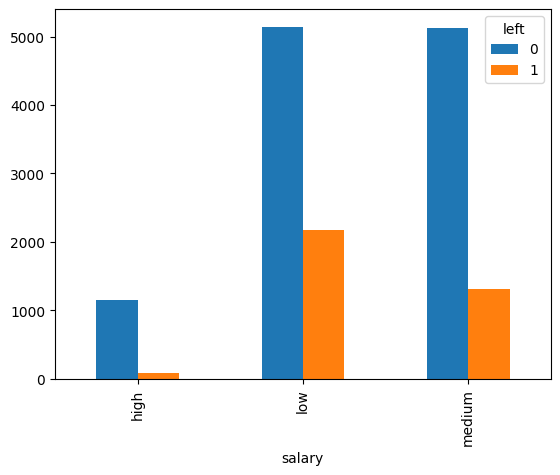

In [9]:
pd.crosstab(df_1['salary'],df['left']).plot(kind='bar')

- The employees with high salaries are not leaving the company.That means very less number of employees with high salaries are leaving the company.

### C.
- Plot bar chart showing correlation between department and employee retention.
- The 'dept' column is a categorical variable that contains a group of department names.
- To see these department names, we can use unique() method.

In [10]:
df_1['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
pd.crosstab(df_1['dept'],df_1['left'])

left,0,1
dept,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<Axes: xlabel='dept'>

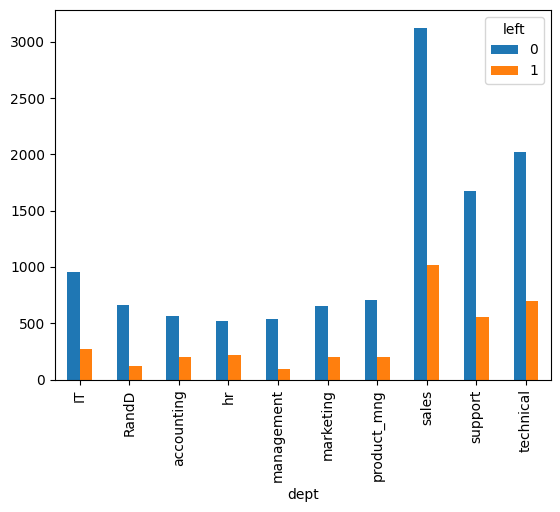

In [12]:
pd.crosstab(df_1['dept'],df_1['left']).plot(kind='bar')

- There exists difference between first and second bars.Hence there is no influence of department on the employee retention.

### D.
- Now build Logistic Regression Model using variables that were narrowed down in steps a and b.
- We found step 'a' that 3 columns which are influencing the employees retention are: 'satisfaction_level','average_montly_hours','promotion_last_5years'.
- We also step 'b' the 'salary' column is also having influence in the employees retention.
- Hence,we are going to take these 4 columns and apply the Logistic Regression Model on them.

In [13]:
subdf = df_1[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [14]:
# Here salary is text categorical data we need to change numeric data and use get_dummies()
salary_dummies = pd.get_dummies(subdf['salary'],prefix='salary',dtype='int') # prefix use for salary use as prefix,salary_high
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


- Let us add these 3 columns to the 'subdf' dataframe using concat() function

In [15]:
df_with_dummmies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummmies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


- Let us remove 'salary' as it is representd by the dummies variable columns.Also to avoid dummy variable trap,we have to remove any one column from the dummy variable columns.i.e. remove salary_medium.

In [16]:
df_with_dummmies.drop(['salary','salary_medium'],axis='columns',inplace=True)

In [17]:
df_with_dummmies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


- Now we shoud take this df_with_dummmies as the independent variables and dependent variable(target variable) is left.

In [18]:
x = df_with_dummmies
y = df['left']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

- Apply the Logistic Regression Model on the train data

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### E.
- Measure the accuracy of the model

In [22]:
model.score(x_test,y_test)

0.7675555555555555

### F.
- Findout if the employees will leave or stay back in the company when his satisfiaction_level is 0.11,average_mobthly_hours of working is 286,No promotion in last 5 year and working with medium salary (0,0,1)

In [23]:
inputs = [[0.11,286,0,0,0]]

In [24]:
model.predict(inputs)

/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

- 1 means the employee will leave the company.

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [26]:
cm = confusion_matrix(y_test,model.predict(x_test))
cm

array([[3196,  232],
       [ 814,  258]])

In [36]:
true_positive = cm[0][0]
false_postive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

In [37]:
accuracy = (true_positive + true_negative)/(true_positive+false_postive+false_negative+true_negative)
accuracy

0.7675555555555555

In [38]:
precision = (true_positive) /(true_positive + false_postive)
precision

0.9323220536756126

In [39]:
recall = (true_positive) / (true_positive + false_negative)
recall

0.7970074812967581

In [43]:
f1_score = (2 * (recall * precision))/(recall + precision)
f1_score

0.8593707986017747

In [33]:
y_pred = model.predict(x_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

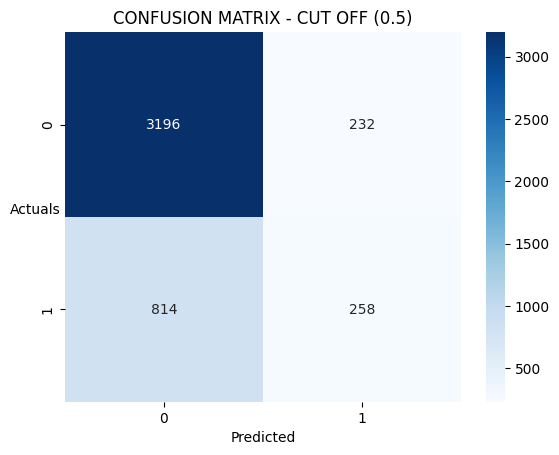

In [34]:
sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

<Axes: >

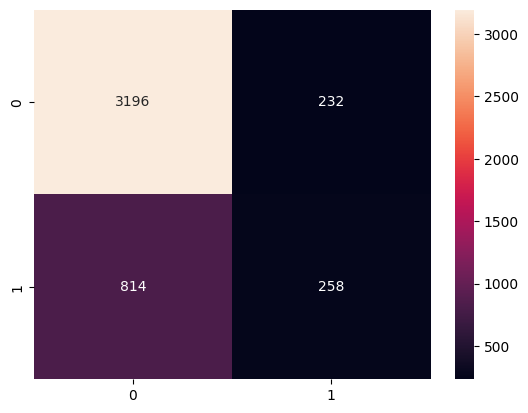

In [35]:
sns.heatmap(cm, annot=True, fmt='d')